# TensorFlow Lite Pose Estimation in Python

In [1]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path="posenet_mobilenet_v1_100_257x257_multi_kpt_stripped.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
input_details

[{'name': 'sub_2',
  'index': 93,
  'shape': array([  1, 257, 257,   3], dtype=int32),
  'shape_signature': array([  1, 257, 257,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [2]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'MobilenetV1/heatmap_2/BiasAdd',
  'index': 87,
  'shape': array([ 1,  9,  9, 17], dtype=int32),
  'shape_signature': array([ 1,  9,  9, 17], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'MobilenetV1/offset_2/BiasAdd',
  'index': 90,
  'shape': array([ 1,  9,  9, 34], dtype=int32),
  'shape_signature': array([ 1,  9,  9, 34], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'MobilenetV1/displacement_fwd_2/BiasAdd',
  'index': 84,
  'shape': array([ 1,  9,  9, 32], dtype=int32),
  'shape_signature': array([ 1,  9,  9, 32], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 

In [3]:
from PIL import Image

im = Image.open("pose1.jpg")
# im = Image.open("pose2.jpg")
# im = Image.open("pose3.jpg")

(251, 201)


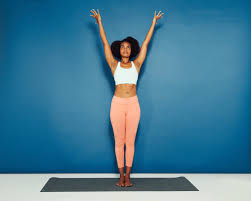

In [4]:
print(im.size)
im

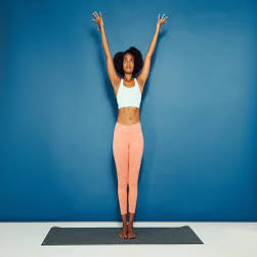

In [5]:
res_im = im.resize((257, 257))
res_im

In [6]:
np_res_im = np.array(res_im)
np_res_im = (np_res_im/255).astype('float32')
np_res_im

array([[[0.01568628, 0.27058825, 0.39607844],
        [0.01568628, 0.27058825, 0.39607844],
        [0.01568628, 0.26666668, 0.40392157],
        ...,
        [0.        , 0.3529412 , 0.5294118 ],
        [0.        , 0.3529412 , 0.5294118 ],
        [0.        , 0.3529412 , 0.5294118 ]],

       [[0.01568628, 0.27058825, 0.39607844],
        [0.01568628, 0.27058825, 0.39607844],
        [0.01568628, 0.26666668, 0.40392157],
        ...,
        [0.        , 0.35686275, 0.53333336],
        [0.        , 0.35686275, 0.53333336],
        [0.        , 0.35686275, 0.53333336]],

       [[0.01568628, 0.27058825, 0.39607844],
        [0.01568628, 0.27058825, 0.39607844],
        [0.01568628, 0.26666668, 0.40392157],
        ...,
        [0.        , 0.35686275, 0.53333336],
        [0.        , 0.35686275, 0.53333336],
        [0.        , 0.35686275, 0.53333336]],

       ...,

       [[0.8352941 , 0.85490197, 0.83137256],
        [0.8352941 , 0.85490197, 0.83137256],
        [0.8352941 , 0

In [7]:
input_details[0]['shape']

array([  1, 257, 257,   3], dtype=int32)

In [8]:
np_res_im.shape

(257, 257, 3)

In [9]:
if len(np_res_im.shape) == 3:
    np_res_im = np.expand_dims(np_res_im, 0)
# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np_res_im
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.

# 1 * 9 * 9 * 17 contains heatmaps
heatmaps = interpreter.get_tensor(output_details[0]['index'])
print(heatmaps.shape)
# 1 * 9 * 9 * 34 contains offsets
offsets = interpreter.get_tensor(output_details[1]['index'])
print(offsets.shape)
# 1 * 9 * 9 * 32 contains forward displacements
forward_displacements = interpreter.get_tensor(output_details[2]['index'])
print(forward_displacements.shape)
# 1 * 9 * 9 * 32 contains backward displacements
backward_displacements = interpreter.get_tensor(output_details[3]['index'])
print(backward_displacements.shape)

(1, 9, 9, 17)
(1, 9, 9, 34)
(1, 9, 9, 32)
(1, 9, 9, 32)


In [10]:
height = heatmaps[0].shape[0]
height

9

In [11]:
width = heatmaps[0][0].shape[0]
width

9

In [12]:
numKeypoints = heatmaps[0][0][0].shape[0]
numKeypoints

17

In [13]:
keypointPositions = []

for keypoint in range(numKeypoints):
    maxVal = heatmaps[0][0][0][keypoint]
    maxRow = 0
    maxCol = 0
    for row in range(height):
        for col in range(width):
            if (heatmaps[0][row][col][keypoint] > maxVal):
                maxVal = heatmaps[0][row][col][keypoint]
                maxRow = row
                maxCol = col
    keypointPositions.append([maxRow,maxCol])
keypointPositions

[[2, 4],
 [2, 4],
 [2, 4],
 [2, 4],
 [2, 4],
 [3, 5],
 [3, 4],
 [2, 5],
 [2, 3],
 [1, 5],
 [2, 3],
 [4, 4],
 [4, 4],
 [5, 4],
 [5, 4],
 [7, 4],
 [7, 4]]

In [14]:
import math

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

confidenceScores=[]
yCoords = []
xCoords = []
for idx, position in enumerate(keypointPositions):
    positionY = keypointPositions[idx][0]
    positionX = keypointPositions[idx][1]
    yCoords.append(position[0] / (height - 1) * 257 + offsets[0][positionY][positionX][idx])
    xCoords.append(position[1] / (width - 1) * 257 + offsets[0][positionY][positionX][idx + numKeypoints])
    confidenceScores.append(sigmoid(heatmaps[0][positionY][positionX][idx]))
#     yCoords.append()
score = np.average(confidenceScores)
score

0.6453105419588542

In [15]:
yCoords

[65.11237400770187,
 61.21803545951843,
 61.895026445388794,
 63.6600683927536,
 65.30794525146484,
 80.14872932434082,
 83.05349445343018,
 57.818307399749756,
 65.80594658851624,
 36.41712522506714,
 49.440964698791504,
 133.4568395614624,
 134.31566524505615,
 177.1634006500244,
 177.02636528015137,
 228.07881569862366,
 228.40333795547485]

In [16]:
xCoords

[128.61740595847368,
 132.17276120185852,
 125.15117955207825,
 141.40283679962158,
 119.08822631835938,
 142.9363784790039,
 117.13381290435791,
 149.76873779296875,
 111.85165309906006,
 158.79112136363983,
 109.16836166381836,
 137.1234951019287,
 117.5705738067627,
 135.18888139724731,
 120.62107992172241,
 128.21640747785568,
 128.20546075701714]

In [17]:
from enum import Enum

class BodyPart(Enum):
    NOSE = 0
    LEFT_EYE = 1
    RIGHT_EYE = 2
    LEFT_EAR = 3
    RIGHT_EAR= 4
    LEFT_SHOULDER = 5
    RIGHT_SHOULDER = 6
    LEFT_ELBOW = 7
    RIGHT_ELBOW = 8
    LEFT_WRIST = 9
    RIGHT_WRIST = 10
    LEFT_HIP = 11
    RIGHT_HIP = 12
    LEFT_KNEE = 13
    RIGHT_KNEE = 14
    LEFT_ANKLE = 15
    RIGHT_ANKLE = 16

In [18]:
bodyJoints = np.array(
    [(BodyPart.LEFT_WRIST, BodyPart.LEFT_ELBOW),
    (BodyPart.LEFT_ELBOW, BodyPart.LEFT_SHOULDER),
    (BodyPart.LEFT_SHOULDER, BodyPart.RIGHT_SHOULDER),
    (BodyPart.RIGHT_SHOULDER, BodyPart.RIGHT_ELBOW),
    (BodyPart.RIGHT_ELBOW, BodyPart.RIGHT_WRIST),
    (BodyPart.LEFT_SHOULDER, BodyPart.LEFT_HIP),
    (BodyPart.LEFT_HIP, BodyPart.RIGHT_HIP),
    (BodyPart.RIGHT_HIP, BodyPart.RIGHT_SHOULDER),
    (BodyPart.LEFT_HIP, BodyPart.LEFT_KNEE),
    (BodyPart.LEFT_KNEE, BodyPart.LEFT_ANKLE),
    (BodyPart.RIGHT_HIP, BodyPart.RIGHT_KNEE),
    (BodyPart.RIGHT_KNEE, BodyPart.RIGHT_ANKLE)]
  )
bodyJoints

array([[<BodyPart.LEFT_WRIST: 9>, <BodyPart.LEFT_ELBOW: 7>],
       [<BodyPart.LEFT_ELBOW: 7>, <BodyPart.LEFT_SHOULDER: 5>],
       [<BodyPart.LEFT_SHOULDER: 5>, <BodyPart.RIGHT_SHOULDER: 6>],
       [<BodyPart.RIGHT_SHOULDER: 6>, <BodyPart.RIGHT_ELBOW: 8>],
       [<BodyPart.RIGHT_ELBOW: 8>, <BodyPart.RIGHT_WRIST: 10>],
       [<BodyPart.LEFT_SHOULDER: 5>, <BodyPart.LEFT_HIP: 11>],
       [<BodyPart.LEFT_HIP: 11>, <BodyPart.RIGHT_HIP: 12>],
       [<BodyPart.RIGHT_HIP: 12>, <BodyPart.RIGHT_SHOULDER: 6>],
       [<BodyPart.LEFT_HIP: 11>, <BodyPart.LEFT_KNEE: 13>],
       [<BodyPart.LEFT_KNEE: 13>, <BodyPart.LEFT_ANKLE: 15>],
       [<BodyPart.RIGHT_HIP: 12>, <BodyPart.RIGHT_KNEE: 14>],
       [<BodyPart.RIGHT_KNEE: 14>, <BodyPart.RIGHT_ANKLE: 16>]],
      dtype=object)

In [19]:
for line in bodyJoints:
    print(line[0].value,line[1].value)

9 7
7 5
5 6
6 8
8 10
5 11
11 12
12 6
11 13
13 15
12 14
14 16


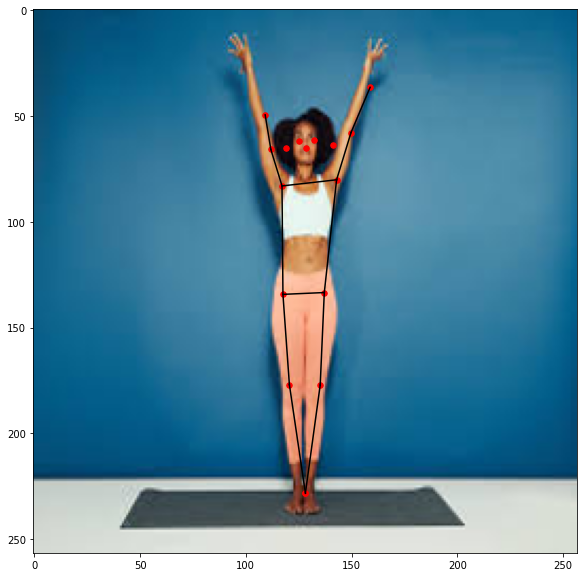

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

minConfidence = 0.5

fig, ax = plt.subplots(figsize=(10,10))

if (score > minConfidence):
    ax.imshow(res_im)
    for line in bodyJoints:
        plt.plot([xCoords[line[0].value],xCoords[line[1].value]],[yCoords[line[0].value],yCoords[line[1].value]],'k-')
    ax.scatter(xCoords, yCoords, s=30,color='r')
    plt.show()